# Week 10/11 Assignment: Document Classification

## Assignment Description

It can be useful to be able to classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  Here is one example of such data:  [http://archive.ics.uci.edu/ml/datasets/Spambase](http://archive.ics.uci.edu/ml/datasets/Spambase)

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified.

## Data Description

We can get information about the dataset from [http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names](http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names).  I've copied the most pertinent parts of that file here:

48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD,
i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail.  A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR
= percentage of characters in the e-mail that match CHAR,
i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), 
i.e. unsolicited commercial e-mail.  

## Get Data

Data is found, without headers, in [http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data](http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data). 

Header names can be found in [http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names](http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names).

In [1]:
names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",\
         "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",\
         "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",\
         "word_freq_people", "word_freq_report", "word_freq_addresses", \
         "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", \
         "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", \
         "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george",\
         "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", \
         "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", \
         "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm",\
         "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original",\
         "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table",\
         "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", \
         "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", \
         "capital_run_length_longest", "capital_run_length_total", "spam"]

import pandas as pd

email_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", \
                        names = names)

email_data.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64             0   
1            0.21               0.28           0.50             0   
2            0.06               0.00           0.71             0   
3            0.00               0.00           0.00             0   
4            0.00               0.00           0.00             0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...   char_freq_;  char_freq_(  \
0             0.00            0.00  ...          0.00        0.000   
1             0.00            0.94  ...          0.00        0.132   
2             0.64            0.25  ...          0.01        0.143   
3             0.31            0.63  ...          0.00        0.137   
4             0.31            0.63  ...          0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0            0        0.778        0.000        0.000   
1            0        0.372        0.180        0.048   
2            0        0.276        0.184        0.010   
3            0        0.137        0.000        0.000   
4            0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

## Prepare for Analysis

In the case of this data, it comes from a specific time frame that might not be reflective of spam habits today, so let's create and test a model on data taken entirely from this data.  We'll want both a training and a testing set in order to do this properly.

First off, how many rows of data do we have overall?


In [2]:
len(email_data)

4601

With over 4600 cases, we should be able to get a great result and we can even set aside some for a "preliminary test set".  Let's set aside about 10% each for testing and prelim testing, and the rest can be training. 

In [3]:
import numpy as np
assignments = np.random.choice(("test", "prelim_test", "train"), p=[0.1, 0.1, 0.8], size=len(email_data))
assignments[0:20]

array(['train', 'train', 'test', 'train', 'train', 'train', 'train',
       'train', 'prelim_test', 'train', 'train', 'prelim_test', 'train',
       'train', 'train', 'test', 'train', 'train', 'train', 'train'], 
      dtype='|S11')

In [4]:
train_set, test_set, prelim_test_set =  email_data[assignments == "train"], \
                                        email_data[assignments == "test"],\
                                        email_data[assignments == "prelim_test"]

## Do a Bit of Visualization

Let's take a peek at our training set to get an idea for some trends.

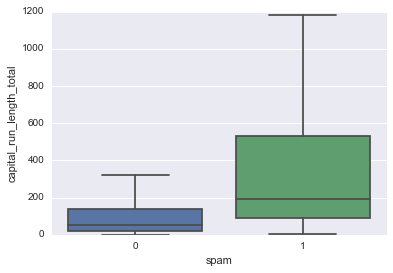

In [5]:
import seaborn as sns
import matplotlib
%matplotlib inline
sns.boxplot(y='capital_run_length_total', x='spam', data=email_data, showfliers=False)

Here, for example, we can see that spam tends to have a higher total capital letter run length than non-spam.  That makes sense when you consider the tone of spam which often has URGENT, EXCITING information to INCITE you to BUY NOW!

## Prepare for ML

In order to prepare for the use of machine learning, it makes sense to consider what we want for our optimal outcome.

For example, it isn't a huge deal if a few spam messages make it through to someone's inbox, but it could be bad for business if a legit email made it into the the spam folder and didn't get answered.  So let's say that accuracy on non-spam is twice as important as accuracy on spam!  We can use class weights (where available) to make sure that the models we generate are biasing the model the way we want -- to be really really good at classifying non-spam, even if that means a few spam emails make it through the filter.

Note that we'll want to consider this weighting as well when we calculate our metrics for evaluating a model.  

## Using Scikit Learn

Let's start with a nearest neighbor algorithm and check out its confusion matrix and accuracy.  We'll take the outcome variable (spam), which is the last column in our training set, and call it "train_truth", while the rest of the variables in our training set become "train_predictors".  Then we'll run a fit where we use k nearest neighbors to create a model, and then use that model to make a prediction, which we can compare to the truth.

### k Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
train_truth = train_set.iloc[:,-1:].values.ravel()
train_predictors = train_set.iloc[:,:-1]
knn.fit(train_predictors, train_truth)
knn_prediction = knn.predict(train_predictors)

I'm not terribly fond of the confusion matrix native to sklearn, so I'm using a pandas crosstab instead:

In [7]:
confusion_matrix = pd.crosstab(train_truth, knn_prediction, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted     0     1   All
True                       
0          1994   240  2234
1           260  1195  1455
All        2254  1435  3689

We'll want some accuracy metrics.  Since our sample is unbalanced (1353 spam to 2788 non-spam), we'd love to have balanced accuracy, but balanced\_accuracy\_score doesn't come out until the next version of sklearn.  Luckily, classification reporting from sklearn is really helpful.

### Aside: Accuracy

What kind of accuracy do we want?  

__Precision__, or the number of true positives divided by true and false positives, is the same thing we would call "Positive Predictive Value".  How likely are we to be right when we rule "that's spam" or "that's not spam"?  It doesn't penalize missing some cases.  For example, if I only said "that's spam" for the most egregious cases, I could be sure that my precision for spam was 100% -- every time I say it, it turns out I'm right.  Of course once I move to the score for "that's not spam" the problem with this approach becomes clear, as my metrics for the other class are really low.

__Recall__, or the number of true positives divided by true positives and false negatives, is also known as sensitivity.  It measures how much of a given class is correctly picked up and doesn't penalize over-enthusiasm (e.g. if I said "it's all spam!" then my recall for the spam class would be 100%).  Again, a sloppy measure like that would be penalized once I looked at the recall for non-spam.

__F1 Score__, or  2\*((precision\*recall)/(precision+recall)), balances precision and recall.

Overall "__accuracy__" is the number of true positives and true negatives (accurate classifications) divided by all classifications.

__Balanced accuracy__ takes accuracy for each class and averages them.

We may also want to come up with weighted metrics or our own methods for coming up with an accuracy metric.  Let's see what comes out of the box of scikit-learn first, though!  Note here that `classification_report` is just a pretty-print version of `precision_recall_fscore_support`.

In [8]:
from sklearn.metrics import classification_report
print "\nPrettified Classification Report: \n\n" + str(classification_report(train_truth, knn_prediction)) 
from sklearn.metrics import precision_recall_fscore_support
print "\nUgly Report:" 
precision_recall_fscore_support(train_truth, knn_prediction)


Prettified Classification Report: 

             precision    recall  f1-score   support

          0       0.88      0.89      0.89      2234
          1       0.83      0.82      0.83      1455

avg / total       0.86      0.86      0.86      3689


Ugly Report:


(array([ 0.88464951,  0.83275261]),
 array([ 0.89256938,  0.82130584]),
 array([ 0.8885918 ,  0.82698962]),
 array([2234, 1455]))

### Custom Accuracy Metric

Now that we have some idea of the accuracy metrics available to us, let's create a custom accuracy metric that weights non-spam higher than spam (because we care more about getting non-spam right).  We'll use positive predictive value, or the precision score, taking two of the f1-score for non-spam (classification = 0) and one of the f1 score for spam (classification = 1) and dividing by three.

In [9]:
from __future__ import division
def custom_accuracy (report):
    ppv_non_spam = report[0][0] # precision = first row -- so [0], non-spam = first col, so [0]
    ppv_spam = report[0][1]
    return ((2*ppv_non_spam) + ppv_spam)/3

Now let's try our custom accuracy on our knn model!

In [10]:
knn_accuracy = custom_accuracy(precision_recall_fscore_support(train_truth, knn_prediction))
knn_accuracy

0.86735054573260906

Not too shabby, but we remember that we're certainly overfitting a bit, so this accuracy will go down in test.  What happens in prelim_test?

In [11]:
prelim_truth = prelim_test_set.iloc[:,-1:].values.ravel()
prelim_predictors = prelim_test_set.iloc[:,:-1]
prelim_knn_prediction = knn.predict(prelim_predictors)
custom_accuracy(precision_recall_fscore_support(prelim_truth, prelim_knn_prediction))

0.80688552004944203

Ugh, that's a big drop... Let's try a few more algorithms to see if we get better performance.

What about a logistic regression?

### Logistic Regression

One cool thing about logistic regression is that we can add class weights!

In [12]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(class_weight = {0:2,1:1})

In [13]:
logistic.fit(train_predictors, train_truth)

LogisticRegression(C=1.0, class_weight={0: 2, 1: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
logistic_prediction = logistic.predict(train_predictors)

In [15]:
pd.crosstab(train_truth, logistic_prediction, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted     0     1   All
True                       
0          2168    66  2234
1           268  1187  1455
All        2436  1253  3689

In [16]:
logistic_accuracy = custom_accuracy(precision_recall_fscore_support(train_truth, logistic_prediction))
logistic_accuracy

0.90909785862588788

Much higher accuracy!  Again, let's do some prelim testing to see if this improved accuracy holds up in testing.

In [17]:
prelim_logistic_prediction = logistic.predict(prelim_predictors)
custom_accuracy(precision_recall_fscore_support(prelim_truth, prelim_logistic_prediction))

0.90858465822122747

That's a much more robust algorithm than knn -- a smaller change, which indicates less overfitting. 

But let's keep going with some additional algorithms.  Maybe a cool fancy neural network?

### Multi-Layer Perceptron

In [18]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(train_predictors, train_truth)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
mlp_prediction = mlp.predict(train_predictors)
pd.crosstab(train_truth, mlp_prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted     0     1   All
True                       
0          2164    70  2234
1           166  1289  1455
All        2330  1359  3689

In [20]:
mlp_accuracy = custom_accuracy(precision_recall_fscore_support(train_truth, mlp_prediction))
mlp_accuracy

0.93533408916974847

This one's pretty good.  Does it hold up to preliminary testing?

In [21]:
prelim_mlp_prediction = mlp.predict(prelim_predictors)
custom_accuracy(precision_recall_fscore_support(prelim_truth, prelim_mlp_prediction))

0.94199134199134205

Nice small change.  This one's a keeper!

But we haven't done a tree or forest algorithm yet.  I'll toss one in for good measure:

### Decision Tree

Decision Trees are another place where we can take advantage of class weights to bias the model to favor accuracy for non-spam.

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight = {0:2,1:1})
tree.fit(train_predictors, train_truth)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
tree_prediction = tree.predict(train_predictors)
pd.crosstab(train_truth, tree_prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted     0     1   All
True                       
0          2234     0  2234
1             2  1453  1455
All        2236  1453  3689

In [24]:
tree_accuracy = custom_accuracy(precision_recall_fscore_support(train_truth, tree_prediction))
tree_accuracy

0.99940369707811572

Holy mackerel!  This is very accurate.  Again, we have to be careful about the danger of overfitting, so let's not get too psyched.

In [25]:
prelim_tree_prediction = tree.predict(prelim_predictors)
custom_accuracy(precision_recall_fscore_support(prelim_truth, prelim_tree_prediction))

0.91971340130311496

There's a drop, for sure, but it's still quite accurate.  I've got one fantastic predictor (tree) and two pretty good ones (Logistic and MLP).  Since these three are outperforming the knn, I'll discard it.  Can I ensemble these three to get some sort of super-model that is greater than the sum of its parts?  I can add the predictions from the three good models to my existing predictors and maybe do a random forest on that?

### Ensembling Successful Models

I'll set up both my training and prelim testing sets with the outputs of the three successful models as columns, and try an algorithm on this combined data -- this is an ensemble method.

In [26]:
train_predictors['logistic_prediction'] = logistic_prediction
train_predictors['mlp_prediction'] = mlp_prediction
train_predictors['tree_prediction'] = tree_prediction

prelim_predictors['logistic_prediction'] = prelim_logistic_prediction
prelim_predictors['mlp_prediction'] = prelim_mlp_prediction
prelim_predictors['tree_prediction'] = prelim_tree_prediction

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight = {0:2,1:1})
rf.fit(train_predictors, train_truth)
rf_prediction = rf.predict(train_predictors)
pd.crosstab(train_truth, rf_prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted     0     1   All
True                       
0          2233     1  2234
1             1  1454  1455
All        2234  1455  3689

Let's check out accuracy -- first on the training, then on the prelim test!

In [28]:
custom_accuracy(precision_recall_fscore_support(train_truth, rf_prediction))

0.99947248654297172

In [29]:
prelim_rf_prediction = rf.predict(prelim_predictors)
custom_accuracy(precision_recall_fscore_support(prelim_truth, prelim_rf_prediction))

0.92241428983002027

Well, we managed to squeeze out a bit more performance using the ensemble method.  Let's call this our classifier!

To recap the method:

- use logistic, mlp, and tree models to come up with predictions.
- add those predictions as additional predictors 
- run a final random forest algorithm on this final set of predictors.

## Test The Performance

In [30]:
test_truth = test_set.iloc[:,-1:].values.ravel()
test_predictors = test_set.iloc[:,:-1]

test_logistic_prediction = logistic.predict(test_predictors)
test_mlp_prediction = mlp.predict(test_predictors)
test_tree_prediction = tree.predict(test_predictors)

test_predictors['logistic_prediction'] = test_logistic_prediction
test_predictors['mlp_prediction'] = test_mlp_prediction
test_predictors['tree_prediction'] = test_tree_prediction

test_rf_prediction = rf.predict(test_predictors)
custom_accuracy(precision_recall_fscore_support(test_truth, test_rf_prediction))

0.920479302832244

Hey, we feel pretty happy with a 92% accuracy rate, as defined by our custom accuracy metric!